# 数据可视化 01 基础知识

matplotlib的API都位于matplotlib.pyplot模块中，通常的引入约定为：

In [1]:
import matplotlib.pyplot as plt

## 概念

* plot plät    策划 plan, scheme, plot

* legend 图例

* label  文本

* title  标题

* axis ˈaksəs   轴

* bar   柱

* pie   饼

* line  线

* box   盒

* color 色

* grid  格

* histogram ˈhistəˌɡram 直方图

* horizontal ˌhôrəˈzän(t)l 水平的

* scatter  ˈskadər  散点图

* sub  səb  子的

* table  表格

* font  字体

* violin ˌvīəˈlin  小提琴

* vertical ˈvərdək(ə)l 垂直的

* limit  限制

* tick  tik   打钩

* scale skāl 范围

## 绘制一张简单的图表检测是否一切就绪

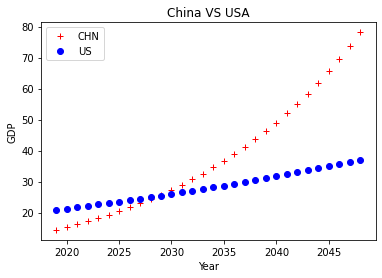

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 假设中国2019年及之后gdp每年增速6%, 美国为2%, 中国大概还需要10年才能超过美帝

CHN = [13.608*1.06**i for i in range(1,31)]
US  = [20.494*1.02**i for i in range(1,31)]


x = np.arange(1,31) + 2018

plt.plot(x , CHN , 'r+' , label = 'CHN')
plt.plot(x , US  , 'bo' , label = 'US')


plt.xlabel('Year')
plt.ylabel('GDP')

plt.title('China VS USA')
plt.legend() # 不妨注释掉这句来观察不同。
plt.show()


## **Figure画图**


```language-text
设置标题      ------  plt.title('AAPL stock price change')  

设置图例      ------  plt.plot(x, y, label='AAPL')  
                     plt.legend()  

设置坐标轴标签 ------　plt.xlabel('time')  
                     plt.ylabel('stock price') 

设置坐标轴范围 ------　plt.xlim(datetime(2008,1,1), datetime(2010,12,31))　　
                     plt.ylim(0,300)  
                     或  　 
                     plt.axis([datetime(2008,1,1), datetime(2010,12,31), 0, 300])  

设置图像大小   ------  plt.figure(figsize=[6,6]) 　　

设置(箭头)标注 ------　plt.annotate() 

添加文字    　------  plt.text() / AxesSubplot.text()
```

## Legend 画图

还可以这样做。

Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the plt.legend() command, which automatically creates a legend for any labeled plot elements:

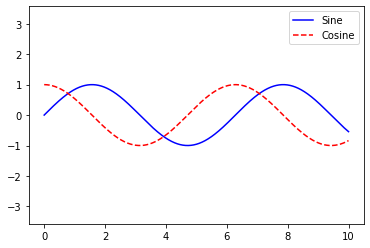

In [14]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

In [ ]:
But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

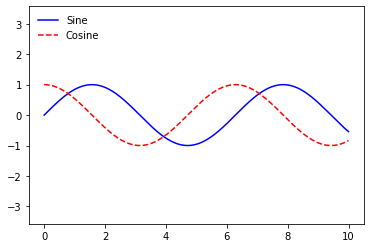

In [15]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the ncol command to specify the number of columns in the legend:

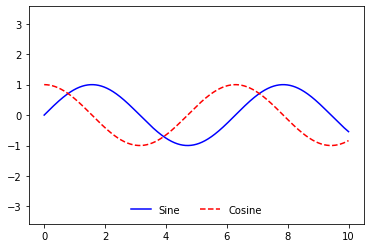

In [16]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (fancybox) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

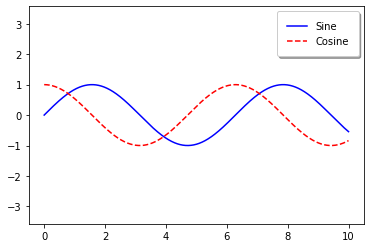

In [17]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend[¶](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html#Choosing-Elements-for-the-Legend)

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The `plt.plot()` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we'd like to specify:

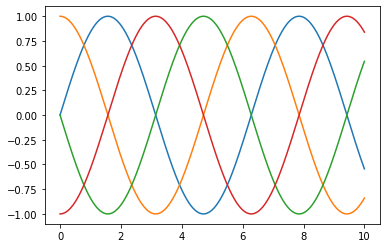

In [19]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))


lines = plt.plot(x, y)

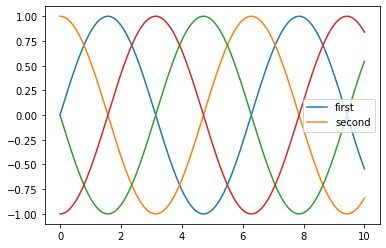

In [22]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))


lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances

plt.legend(lines[:2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

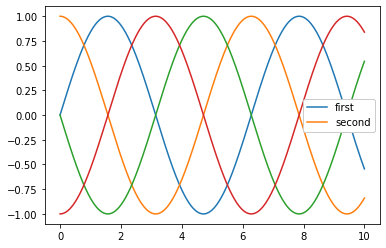

In [23]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a label attribute set.

In [28]:
import pandas as pd


path = "mat50datas/stock_px_2.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


<AxesSubplot:>

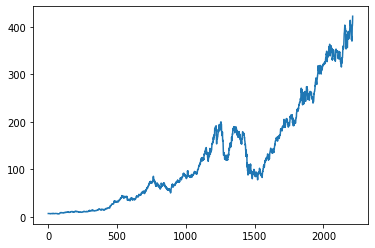

In [29]:
df["AAPL"].plot()

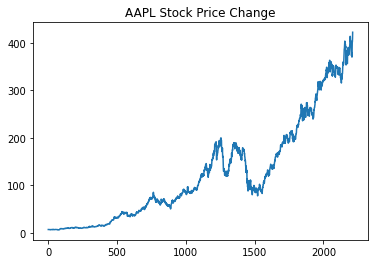

In [30]:
# 设置标题

df["AAPL"].plot()
plt.title("AAPL Stock Price Change")
plt.show()

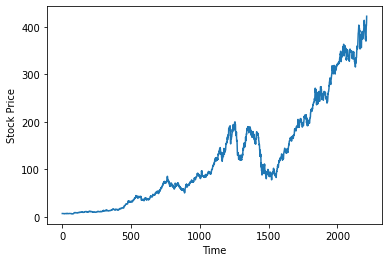

In [37]:
# 设置坐标轴标签
df["AAPL"].plot()
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

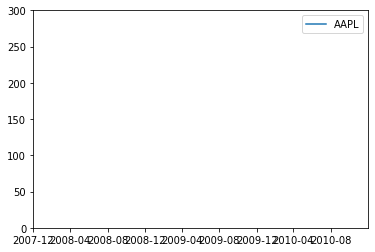

In [39]:
from datetime import datetime
# 设置坐标轴范围

# 可以通过plt.xlim()和plt.ylim()分别设置x轴和y轴的坐标轴范围

df["AAPL"].plot()
plt.xlim(datetime(2008,1,1),datetime(2010,12,31))
plt.ylim(0,300)
plt.legend()
plt.show()

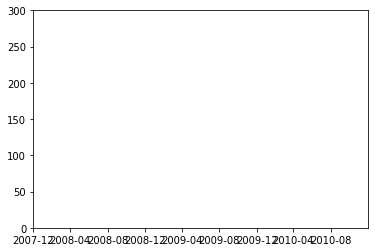

In [41]:
# 也可以通过plt.axis()传入一个列表一次性设置, 列表的4个值分别为x轴起点, x轴终点, y轴起点, y轴终点

df["AAPL"].plot()
plt.axis([datetime(2008,1,1),datetime(2010,12,31),0,300])
plt.show()

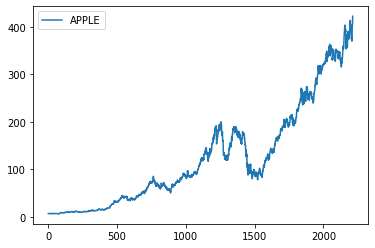

In [42]:
# 设置图例

df["AAPL"].plot(label="APPLE")
plt.legend()
plt.show()

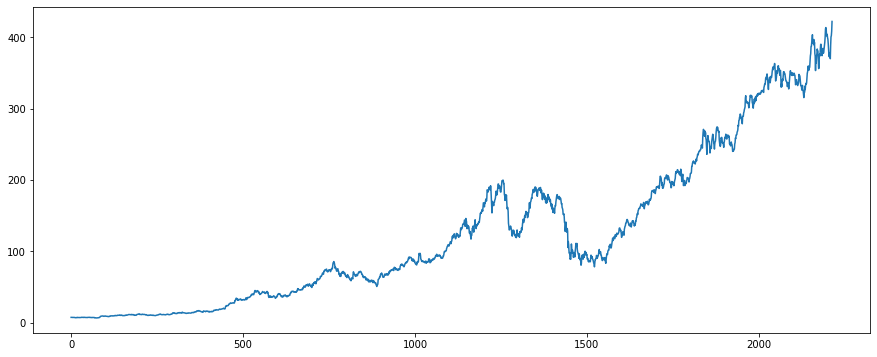

In [43]:
# 设置图像大小

plt.figure(figsize=[15,6])
df["AAPL"].plot()
plt.show()

## 设置箭头标注

annotate(s, xy, *args, **kwargs)


s               注释字符串

xy              注释目标点的坐标

xytext          注释字符串的坐标

textcoords      注释字符串(xytext)所在的坐标系统
                默认与xy所在的相同,也可以设置为'offset points'或'offset pixels'
                这种偏移量的形式

arrowprops      箭头属性, 字典
                
                arrowstyle      箭头样式

                 ============   =============================================
                 Name           Attrs
                 ============   =============================================
                 ``'-'``        None
                 ``'->'``       head_length=0.4,head_width=0.2
                 ``'-['``       widthB=1.0,lengthB=0.2,angleB=None
                 ``'|-|'``      widthA=1.0,widthB=1.0
                 ``'-|>'``      head_length=0.4,head_width=0.2
                 ``'<-'``       head_length=0.4,head_width=0.2
                 ``'<->'``      head_length=0.4,head_width=0.2
                 ``'<|-'``      head_length=0.4,head_width=0.2
                 ``'<|-|>'``    head_length=0.4,head_width=0.2
                 ``'fancy'``    head_length=0.4,head_width=0.4,tail_width=0.4
                 ``'simple'``   head_length=0.5,head_width=0.5,tail_width=0.2
                 ``'wedge'``    tail_width=0.3,shrink_factor=0.5
                 ============   =============================================

                 connectionstyle   连接样式
                                   具体见下图

![2yecXd](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/2yecXd.jpg)

ValueError: x and y must have same first dimension, but have shapes (30,) and (1000, 4)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


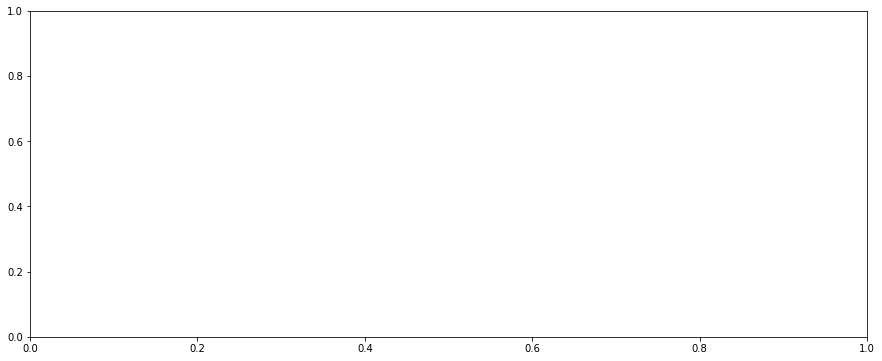

In [44]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=[15,6])
plt.plot(x,y,label="APPLE")
plt.title("APPLE Stock Price Change")
plt.annotate("2018年9月15日，\n雷曼兄弟宣布破产",xy=[datetime(2008,9,15),100],xytext=[datetime(2007,7,15),200],
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3'))

plt.xlabel['Time']
plt.ylabel['Stock Price']

plt.ylim(0,500)
plt.xlim(datetime(1990,2,1),datetime(2015,2,1))

plt.legend()

In [62]:
import matplotlib
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"../download/Alibaba-PuHuiTi-Medium.ttf", size=12) ##可以自由下载字体使用
matplotlib.rcParams['font.sans-serif'] = ['Alibaba-PuHuiTi-Medium']

In [63]:
df.columns

Index(['Unnamed: 0', 'AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2214 non-null   object 
 1   AAPL        2214 non-null   float64
 2   MSFT        2214 non-null   float64
 3   XOM         2214 non-null   float64
 4   SPX         2214 non-null   float64
dtypes: float64(4), object(1)
memory usage: 86.6+ KB


In [65]:
df['Unnamed: 0']

0       2003-01-02 00:00:00
1       2003-01-03 00:00:00
2       2003-01-06 00:00:00
3       2003-01-07 00:00:00
4       2003-01-08 00:00:00
               ...         
2209    2011-10-10 00:00:00
2210    2011-10-11 00:00:00
2211    2011-10-12 00:00:00
2212    2011-10-13 00:00:00
2213    2011-10-14 00:00:00
Name: Unnamed: 0, Length: 2214, dtype: object

In [66]:
datetime.strptime('2003-01-02 00:00:00', "%Y-%m-%d 00:00:00")

datetime.datetime(2003, 1, 2, 0, 0)

In [67]:
x = df['Unnamed: 0'].apply(lambda x : datetime.strptime(x, "%Y-%m-%d 00:00:00"))
y = df['AAPL']

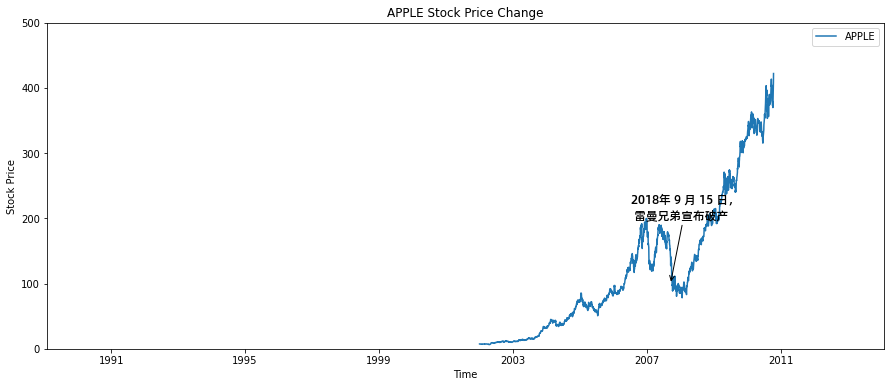

In [70]:
# plt.rcParams['font.sans-serif'] = ['Alibaba-PuHuiTi-Medium']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=[15,6])

plt.plot(x,y,label="APPLE")

plt.title("APPLE Stock Price Change")
plt.annotate("2018年 9 月 15 日，\n 雷曼兄弟宣布破产",xy=[datetime(2008,9,15),100],xytext=[datetime(2007,7,15),200],
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3'), fontproperties=font_set)

plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.ylim(0,500)
plt.xlim(datetime(1990,2,1),datetime(2015,2,1))

plt.legend()

In [71]:
# 把textcoords设为偏移量的形式：

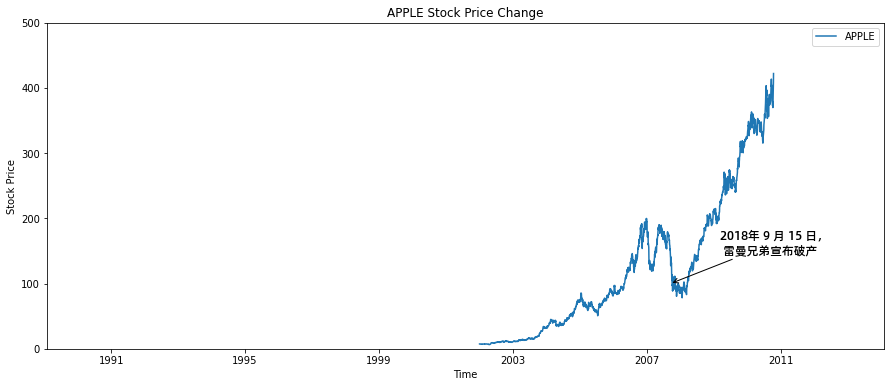

In [74]:
# plt.rcParams['font.sans-serif'] = ['Alibaba-PuHuiTi-Medium']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=[15,6])

plt.plot(x,y,label="APPLE")

plt.title("APPLE Stock Price Change")

# xytext=[50,30]表示注释字符串的位置相对于注释目标点的位置右移50，上移30；还可以通过fontsize设置标注的文字大小

plt.annotate(
            "2018年 9 月 15 日，\n 雷曼兄弟宣布破产",
             xy=[datetime(2008,9,15),100],
             xytext=[50,30],
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3'), 
             fontproperties=font_set
            )

plt.xlabel('Time')
plt.ylabel('Stock Price')

plt.ylim(0,500)
plt.xlim(datetime(1990,2,1),datetime(2015,2,1))

plt.legend()

## **添加文本**

```language-text
text(x, y, s, fontdict=None, **kwargs)

在(x,y)坐标处添加文本

x         文本的x坐标

y         文本的y坐标

s         文本

fontsize  文本字体大小

ha        ha是HorizontalAlignment的简写，ha='center'即水平对齐， 
          除此之外还可以选择'left'(左对齐)或'right'(右对齐)

va        va则是VerticalAlignment的简写，va可以选择
          [ 'center' | 'top' | 'bottom' | 'baseline' ]中的任何一个，
          意思分别为'垂直居中'、'顶端居中'、'底端居中'和'底线居中'
```

## **颜色、标记、线型和图表风格————color、marker、linestyle和style**

```language-text
plot(x,y,color='',marker='',linestyle='')
```

matplotlib的plot函数接受一组X和Y坐标，还可以通过color、marker和linestyle关键字传入指定的颜色、标记和线型，或者用一个表示颜色、标记和线型的格式字符串替代，两种方法是等效的。格式字符串中color、marker和linestyle可以任意排列，如'ko--'，'k--o'，'o--k'

如果要根据x和y绘制绿色虚线，可以执行如下代码：

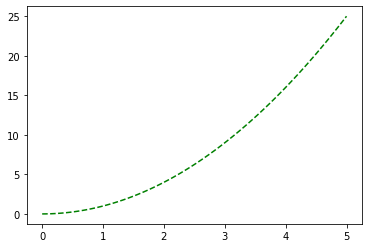

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,100)
y = [i**2 for i in x]

plt.plot(x,y,'g--')
plt.show()

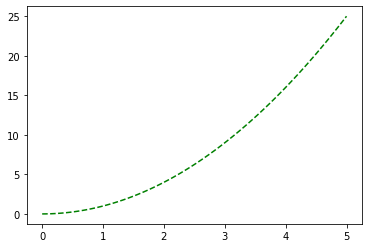

In [77]:
# 也可以通过关键字显式指定：

plt.plot(x,y,color='g',linestyle='--')
plt.show()

## 常用的颜色都有一个缩写词，如:

```language-text
    =============    ===============================
    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================
```

详细的corlor如下

![fSai7k](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/fSai7k.jpg)

要使用其他颜色任意颜色可以指定特定颜色的16进制颜色码，如'#998301'。

线形图还可以加上一些标记（marker），以强调实际的数据点



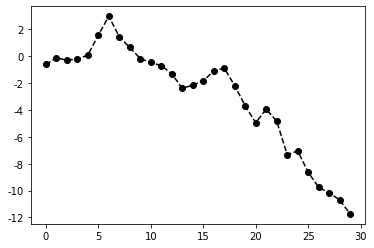

In [78]:
y = np.random.randn(30).cumsum()

plt.plot(y,'ko--')
plt.show()

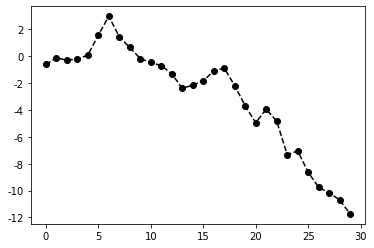

In [79]:
# 和上面的方法等效：

plt.plot(y,color='k',marker='o',linestyle='--')
plt.show()

## 完整的marker样式

![ZUOyk4](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ZUOyk4.jpg)

## Style

再讲style，matplotlib的style有如下几种

![tqx3ET](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/tqx3ET.jpg)

以plt.style.use('ggplot')的形式使用

![chd2TF](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/chd2TF.jpg)

[各风格字符串对应的效果见](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

![QulrK7](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/QulrK7.jpg)

## **Subplot画图**

**i）plt.subplots创建多个子图**

plt.subplots()方法创建一个figure对象和指定布局的多个子图,  返回一个figure对象和一个Axes对象的数组

```language-text
subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True,
         subplot_kw=None, gridspec_kw=None, **fig_kw)

参数                 说明
nrows                subplot的行数
ncols                subplot的列数
sharex               所有subplot使用相同的X轴刻度（调节xlim将会影响所有subplot）
sharey               所有subplot使用相同的Y轴刻度（调节ylim将会影响所有subplot）
```

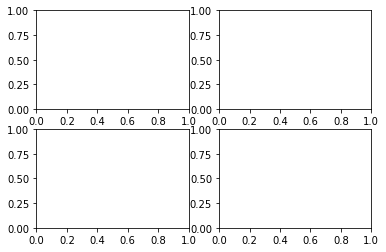

In [81]:
fig,axes = plt.subplots(2,2)

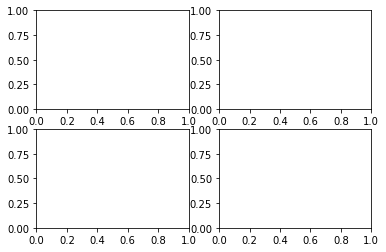

In [82]:
fig

In [83]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [84]:
axes[0,0]

<AxesSubplot:>

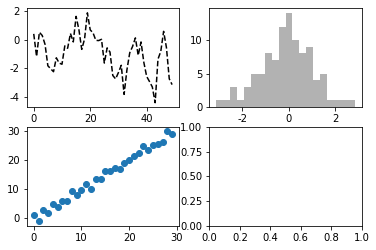

In [88]:
# 返回的AxesSubplot对象的数组非常好用, 数组中的每个元素都代表一个子图, 
# 数组的形状就是子图的布局(layout), 通过对这个数组的索引（如axes[0,1]）
# 调用AxesSubplot对象的实例方法就可以实现在对应的子图里画图了

import matplotlib.pyplot as plt

fix,axes = plt.subplots(2,2)

axes[0,0].plot(np.random.randn(50).cumsum(),'k--')

axes[0,1].hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

axes[1,0].scatter(np.arange(30),np.arange(30)+np.random.randn(30))

plt.show()

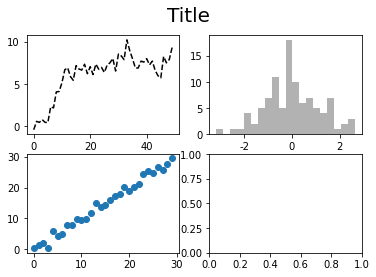

In [91]:
# 讲完了axes对象，讲一下figure

# plt.suptitle() / fig.suptitle()方法可以为figure对象添加一个居中的标题，对于多个子图的情况经常用到这一方法

fig,axes = plt.subplots(2,2)
fig.suptitle('Title',fontsize=20)
axes[0,0].plot(np.random.randn(50).cumsum(),'k--')
axes[0,1].hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
axes[1,0].scatter(np.arange(30),np.arange(30)+np.random.randn(30))
plt.show()

**ii）plt.subplot创建子图**

plt.subplot()方法用于在当前figure对象中添加子图

```language-text
subplot(nrows, ncols, index, **kwargs)
```

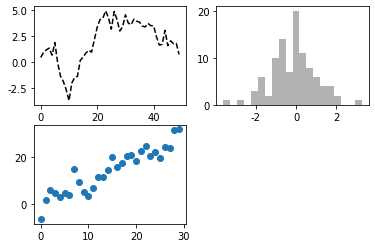

In [92]:
plt.subplot(221)
plt.plot(np.random.randn(50).cumsum(),'k--')

plt.subplot(222)
plt.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

plt.subplot(223)
plt.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

plt.show()

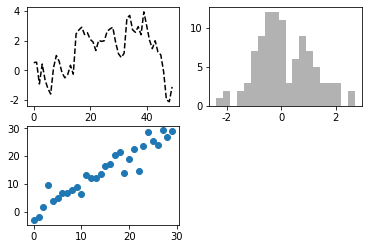

In [93]:
plt.subplot(2,2,1)
plt.plot(np.random.randn(50).cumsum(),'k--')

plt.subplot(2,2,2)
plt.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

plt.subplot(2,2,3)
plt.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

plt.show()

**iii）调整suplot周围的间距————subplots_adjust**

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果调整了图像大小，间距也会自动调整。利用Figure对象subplots_adjust方法可以轻而易举地修改间距，此外，它也是一个顶级函数（可以通过plt.subplots_adjust()的方式调用）

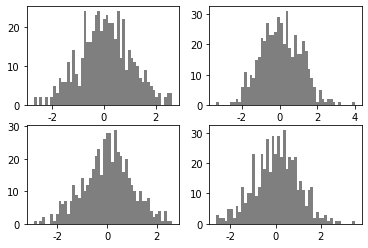

In [94]:
fig,axes = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)

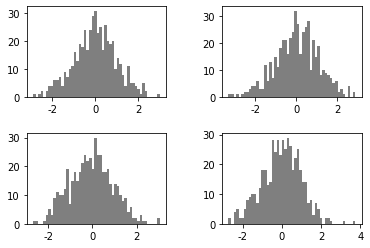

In [95]:
fig,axes = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
fig.subplots_adjust(wspace=0.4,hspace=0.4)

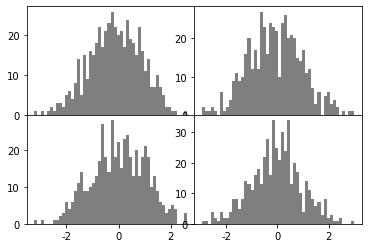

In [96]:
fig,axes = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
fig.subplots_adjust(wspace=0,hspace=0)

**iv）设置子图的标题、轴标签、刻度、刻度标签以及添加图例**

```language-text
AxesSubplot.set_title()           #设置标题

AxesSubplot.set_xlabel()          #设置轴标签
AxesSubplot.set_ylabel()         

AxesSubplot.set_xticks()          #设置刻度 （横坐标等于哪些值的时候显示刻度）
AxesSubplot.set_yticks()

AxesSubplot.set_xticklabels()     #设置刻度标签 （刻度之下显示什么，默认是其代表的值）
AxesSubplot.set_yticklabels()
```

上面都是AxesSubplot对象的实例方法。

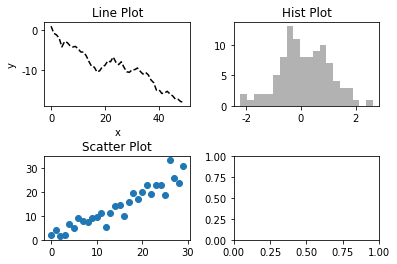

In [97]:
fig,axes = plt.subplots(2,2)

axes[0,0].plot(np.random.randn(50).cumsum(),'k--',label='eg')
axes[0,0].set_title('Line Plot')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')


axes[0,1].hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
axes[0,1].set_title('Hist Plot')

axes[1,0].scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
axes[1,0].set_title('Scatter Plot')


plt.subplots_adjust(wspace=0.3,hspace=0.6)
plt.show()

## **pandas中的绘图函数**

matplotlib实际上是一种比较低级的工具。要组装一张图表，你得用它的各种基础组件才行：

* 图表类型（线形图、柱状图、盒形图、散点图、等值线图等）
* 标题
* 图例
* 刻度
* 刻度标签
* 轴标签
* 注释

这是因为要根据数据制作一张完整的图表通常都需要用到多个对象。在pandas中，我们有行标签、列标签以及分组信息(可能有)。这也就是说，要制作一张完整的图表，原本需要一大堆的matplotlib代码，现在只需要一两条简洁的语句就可以了。pandas有许多能够利用DataFrame对象数据组织特点来创建图表的高级绘图方法。

s.plot() / df.plot()方法API：

```language-text
(self, 
kind='line', 
ax=None, 
figsize=None, 
use_index=True, 
title=None, 
grid=None, 
legend=False, 
style=None, 
logx=False, 
logy=False, 
loglog=False,
xticks=None, 
yticks=None, 
xlim=None, 
ylim=None, 
rot=None, 
fontsize=None, 
colormap=None, 
table=False, 
yerr=None, 
xerr=None, 
label=None, 
secondary_y=False, **kwds)

参数                  说明

kind                  图表类型
                      - 'line' : line plot (default)
                      - 'bar' : vertical bar plot
                      - 'barh' : horizontal bar plot
                      - 'hist' : histogram
                      - 'box' : boxplot
                      - 'kde' : Kernel Density Estimation plot
                      - 'density' : same as 'kde'
                      - 'area' : area plot
                      - 'pie' : pie plot
                      - 'scatter' : scatter plot
                      - 'hexbin' : hexbin plot

figsize               设置图像大小
                      a tuple (width, height) in inches

fontsize              轴标签的字体大小
                      int, default None

use_index             将对象的索引用作刻度标签
                      bool, default True

title                 设置图表标题

rot                   旋转刻度标签(0到360)

grid                  显示轴网格线（默认打开）

xlim                  X轴的界限，如[0,10]

ylim                  Y轴的界限

xticks                用作X轴刻度的值

yticks                用作Y轴刻度的值

logy                  在Y轴上使用对数标尺

label                 用于图例的标签

style                 要传给matplotlib的风格字符串
                     （也可以通过color、marker、linstyle关键字分别传入）

alpha                 图表的填充不透明度(0到1之间)

重点参数：
          kind
          ax
          title
          label
          figsize
```

### **i）线形图**

**Series画线形图**

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们生成的都是线形图。

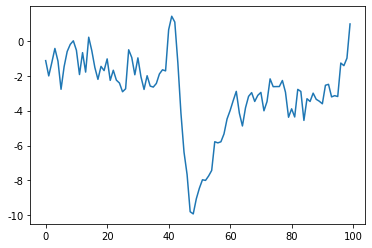

In [98]:
s = pd.Series(np.random.randn(100).cumsum())
s.plot()
plt.show()

Series对象的索引默认会作为X轴, 可以通过use_index=False禁用。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴类似。

**DataFrame画线形图**

```language-text
专用于DataFrame的plot参数：

参数                   说明
subplots               将各个DataFrame列绘制到单独的subplot中

sharex                 如果subplots=True，则公用一个X轴，包括刻度和界限

sharey                 如果subplots=True，则公用一个Y轴

legend                 添加一个subplot图例，默认为True

sort_columns           以字符表顺序绘制各列，默认使用当前的顺序
```

DataFrame的plot方法默认会为各列绘制一条线，并自动创建图例

In [99]:
df = pd.read_csv(path,index_col=0,parse_dates=True)

df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


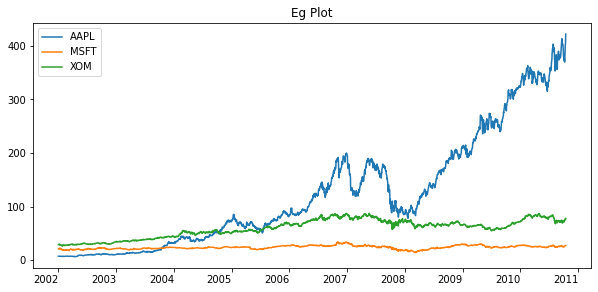

In [100]:
df[df.columns[:3]].plot(title='Eg Plot',figsize=[10,5],rot=0)
plt.show()

设置subplot=True将DataFrame的各列绘制到不同的子图

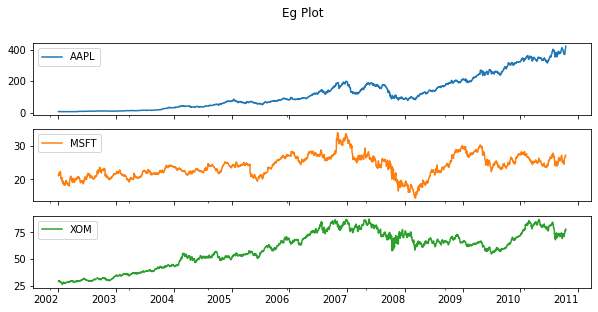

In [101]:
df[df.columns[:3]].plot(title='Eg Plot',figsize=(10,5),subplots=True,rot=0)
plt.show()

有时我们还会遇到要将DataFrame列的不同的子集绘制到不同子图上的情形(different subsets of the columns)

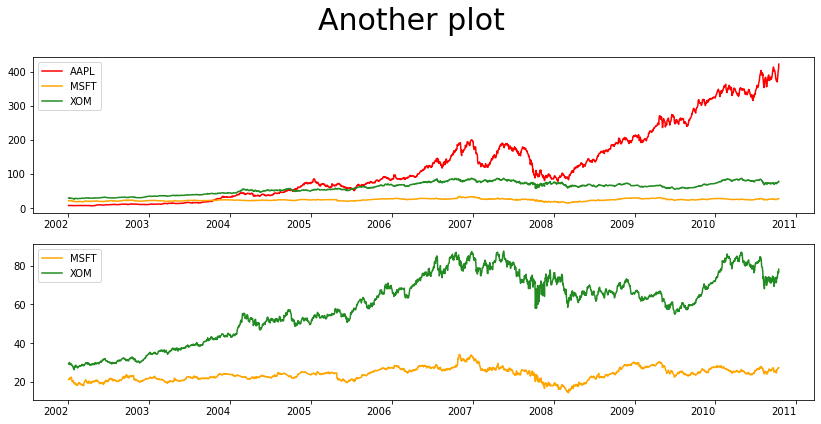

In [104]:
fig,axes = plt.subplots(2,1)
fig.suptitle('Another plot',fontsize=30)

df[df.columns[:3]].plot(ax=axes[0],figsize=[14,7],style=['red','orange','forestgreen'],rot=0)
df[['MSFT','XOM']].plot(ax=axes[1],figsize=[14,7],style=['orange','forestgreen'],rot=0)

plt.show()

如果你用DataFrame.plot()的形式，那么图例会使用列名并自动显示(不需要加plt.legend())，但如果你使用的是Series.plot()，如df.close.plot()，则列名/Series.name不会自动作为图例显示。

### **ii）柱形图/条形图**

在生成线形图的代码中加上kind='bar'（垂直条形图）或kind='barh'（水平条形图）即可生成条形图。

**Series画条形图**

Series的索引将会被用作X(bar)轴或Y轴(barh)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv("./mat50datas/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.groupby('day')['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

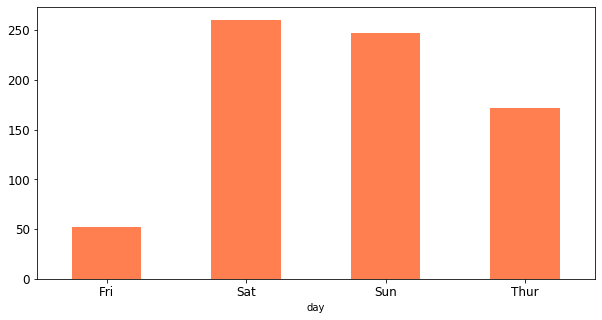

In [5]:
groupby = tips.groupby('day')['tip'].sum()
groupby.plot(kind='bar',color='coral',figsize=(10,5),rot=0,fontsize=12)
plt.show()

**DataFrame画条形图**

对于DataFrame， 条形图默认会将每一行的值分为一组。

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv("./mat50datas/tips.csv")
tips.head()

tips.groupby(['day','time'])['tip'].sum()


day   time  
Fri   Dinner     35.28
      Lunch      16.68
Sat   Dinner    260.40
Sun   Dinner    247.39
Thur  Dinner      3.00
      Lunch     168.83
Name: tip, dtype: float64

In [7]:
tips.groupby(['day','time'])['tip'].sum().unstack()

time,Dinner,Lunch
day,,
Fri,35.28,16.68
Sat,260.40,NaN
Sun,247.39,NaN
Thur,3.00,168.83


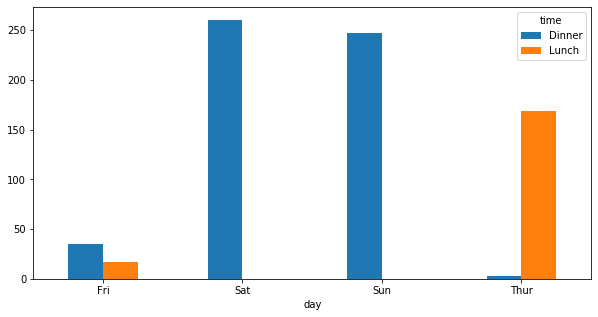

In [8]:
result = tips.groupby(['day','time'])['tip'].sum().unstack()
result.plot(kind='bar',figsize=(10,5),rot=0)
plt.show()

设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起：

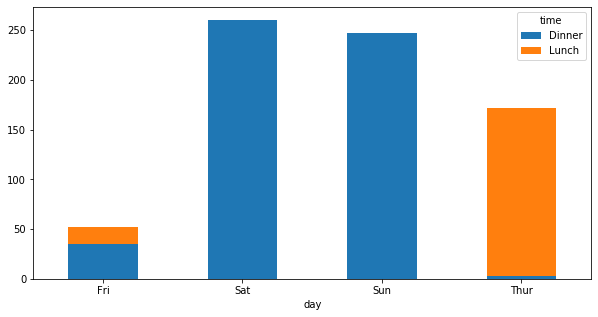

In [9]:
result.plot(kind='bar',stacked=True,figsize=(10,5),rot=0)
plt.show()

制作一张统计不同day不同time的聚会数量的条形图

In [10]:
pd.crosstab(tips['time'],tips['day'])

day,Fri,Sat,Sun,Thur
time,,,,
Dinner,12,87,76,1
Lunch,7,0,0,61


In [11]:
pd.crosstab(tips['time'],tips['day']).T

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


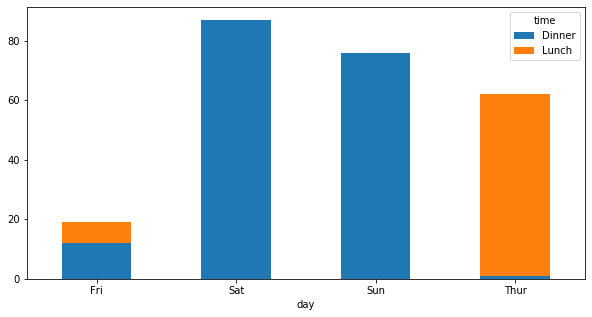

In [12]:
result = pd.crosstab(tips['time'],tips['day']).T
result.plot(kind='bar',stacked=True,figsize=(10,5),rot=0)
plt.show()

再看一下每天中午和晚上聚会数量的占比:

In [13]:
result

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


In [14]:
result.div(result.sum(axis=1),axis=0)

time,Dinner,Lunch
day,,
Fri,0.631579,0.368421
Sat,1.000000,0.000000
Sun,1.000000,0.000000
Thur,0.016129,0.983871


In [16]:
result.div(result.sum(axis='columns'),axis='index')

time,Dinner,Lunch
day,,
Fri,0.631579,0.368421
Sat,1.000000,0.000000
Sun,1.000000,0.000000
Thur,0.016129,0.983871


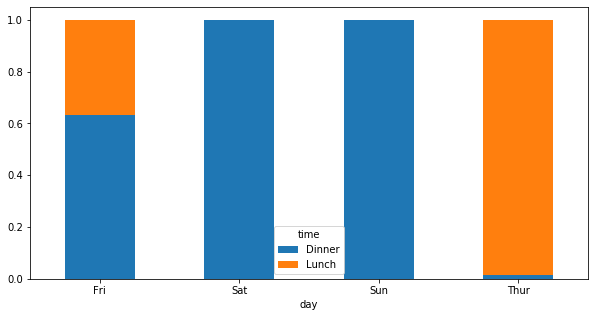

In [17]:
result.div(result.sum(axis='columns'),axis='index').plot(kind='bar',stacked=True,figsize=(10,5),rot=0)
plt.show()

### **iii）直方图和密度图**

再以前面的小费数据集为例，生成一张“小费占消费总额的百分比“的直方图：

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips['tip_pct'] = tips['tip'].div(tips['total_bill'])

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


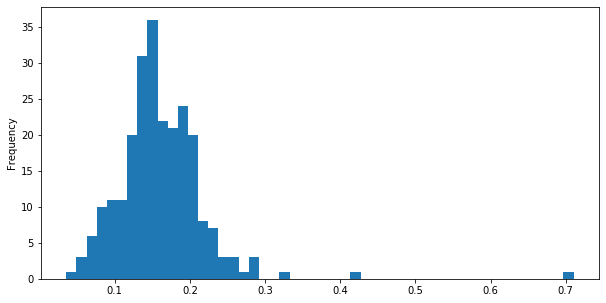

In [21]:
tips['tip_pct'].plot(kind='hist',bins=50,figsize=(10,5))

为DataFrame各数值列绘制直方图

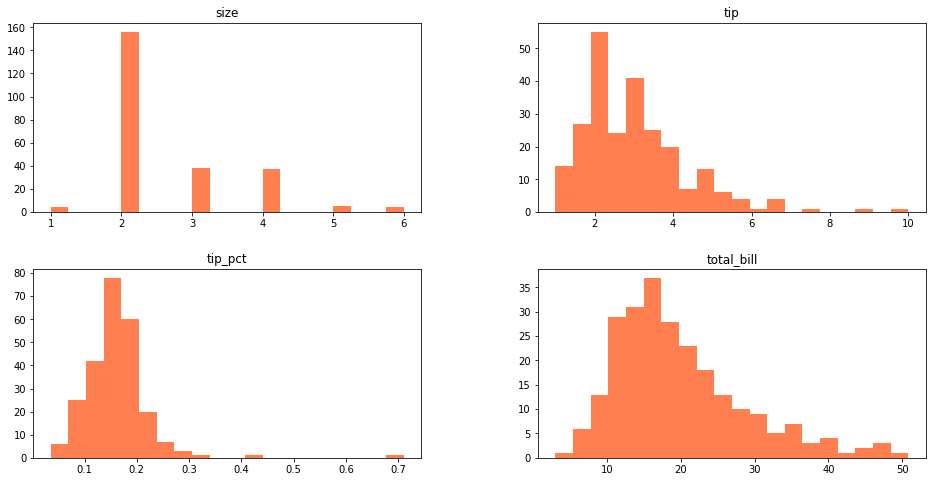

In [22]:
tips.hist(figsize=(16,8),bins=20,grid=False,color='coral')

### **核密度图**

与直方图相关的另一种图表类型是**核密度图**，它是通过计算”**观测数据的连续概率分布的估计**“而产生的。一般的过程是将该分布近似为一组核（即诸如正态(高斯)分布之类的较为简单的分布）。因此，核密度图也被称为KDE（Kernel Density Estimate,核密度估计）图。调用plot时加上kind='kde'即可生成一张密度图（标准混合正态分布KDE）

我们看一下kde和hist的对比

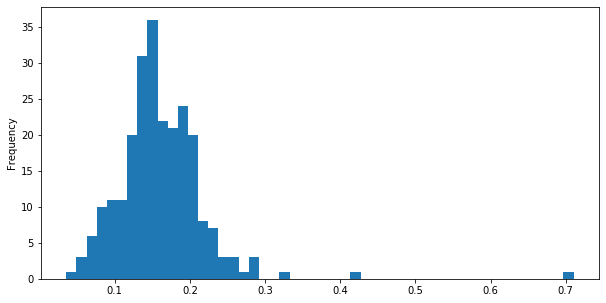

In [23]:
tips['tip_pct'].plot(kind='hist',bins=50,figsize=(10,5))
plt.show()

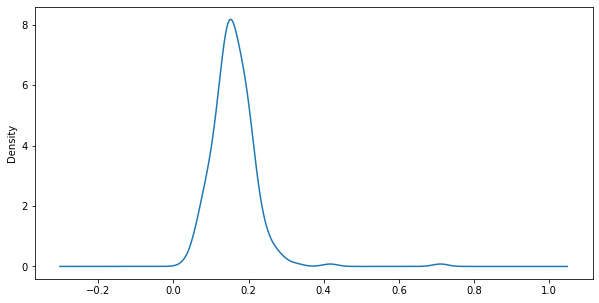

In [24]:
tips['tip_pct'].plot(kind='kde',figsize=(10,5))
plt.show()

当然, 占比不可能为负,也不太可能大于1, 再指定一下x轴的范围

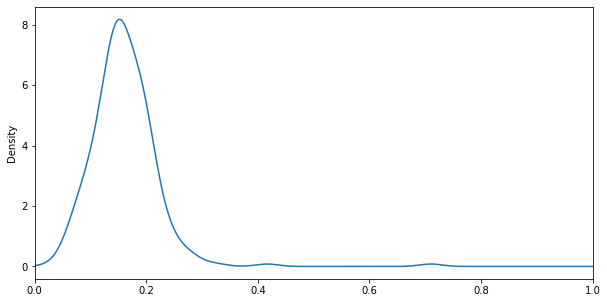

In [25]:
tips['tip_pct'].plot(kind='kde',figsize=(10,5),xlim=(0,1))
plt.show()

这两种图表常常会被画在一起。直方图以规格化的形式给出（设置density=True），然后再继续绘制核密度估计。

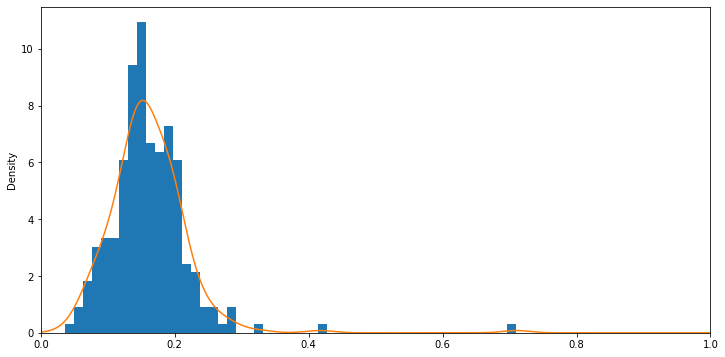

In [26]:
tips['tip_pct'].plot(kind='hist',bins=50,figsize=(12,6),density=True)
tips['tip_pct'].plot(kind='kde',xlim=(0,1))
plt.show()

### **iv）散点图(scatter)和散点图矩阵(scatter matrix)**

**散点图**

散点图（scatter plot）是观察两个一维数组序列之间的关系的有效手段。matplotlib的scatter方法是绘制散点图的主要方法, 也可以对DataFrame对象调用plot()方法, 指定kind为'scatter'。

In [29]:
!pwd

/data/nas/workspace/jupyter/Matplotlib


In [30]:
housing = pd.read_csv('./mat50datas/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


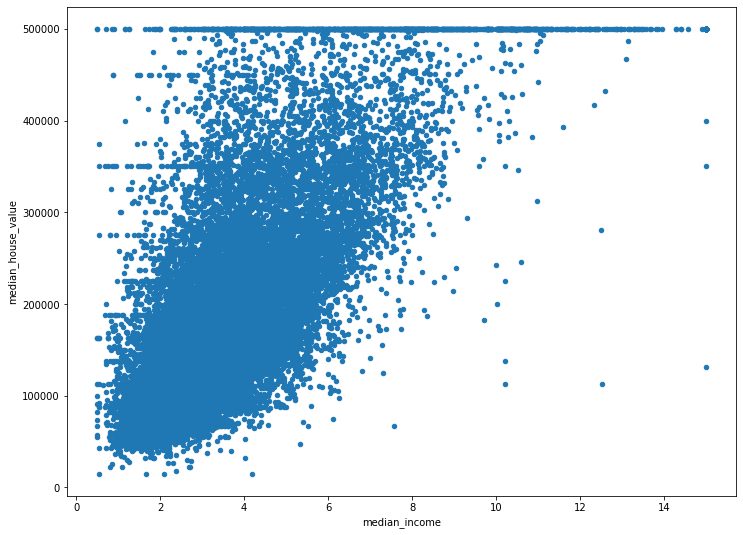

In [31]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',figsize=(12,9))
plt.show()

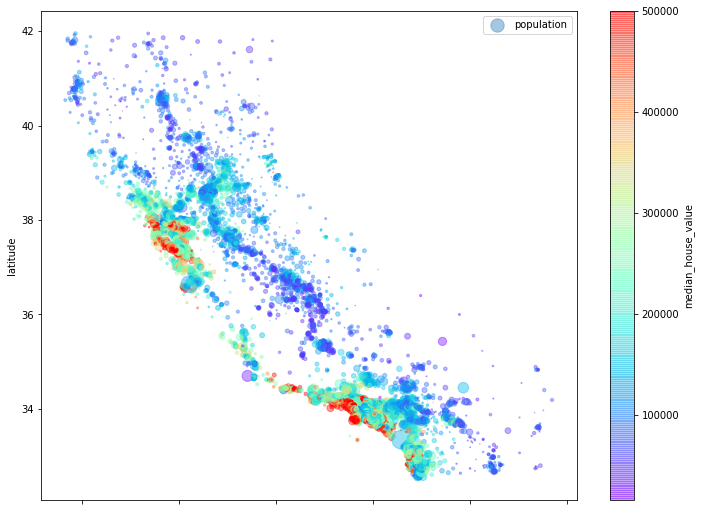

In [33]:
housing.plot(kind='scatter',x='longitude',y='latitude',
             s=housing.population/100,c='median_house_value',
            label='population',figsize=(12,9),
            alpha=0.4,
            cmap=plt.get_cmap('rainbow'))
plt.show()

- If `kind` = 'scatter' 

c, 即'color', 其值为DataFrame中某一列的列名, 用于将颜色与这列的值相关联

s, 即'size', 其值为DataFrame中某一列的列名, 用于将图形大小与这列的值相关联

[colormap 参考网站](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)


### **散点图矩阵**

在探索式数据分析工作中，同时观察不同列之间的散点图是很有意义的，这也被称为散点矩阵（scatter matrix）。纯手工创建这样的图表很费功夫，所以pandas提供了一个能从DataFrame创建散点图矩阵的scatter_matrix函数。它还支持在对角线上放置各变量的直方图或密度图。

```language-text
Draw a matrix of scatter plots.

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', 
               marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, 
               **kwds)

frame : DataFrame

figsize : (float,float), optional
        a tuple (width, height) in inches

diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal

重点参数：
         frame
         diagonal
         figsize
```

for example：

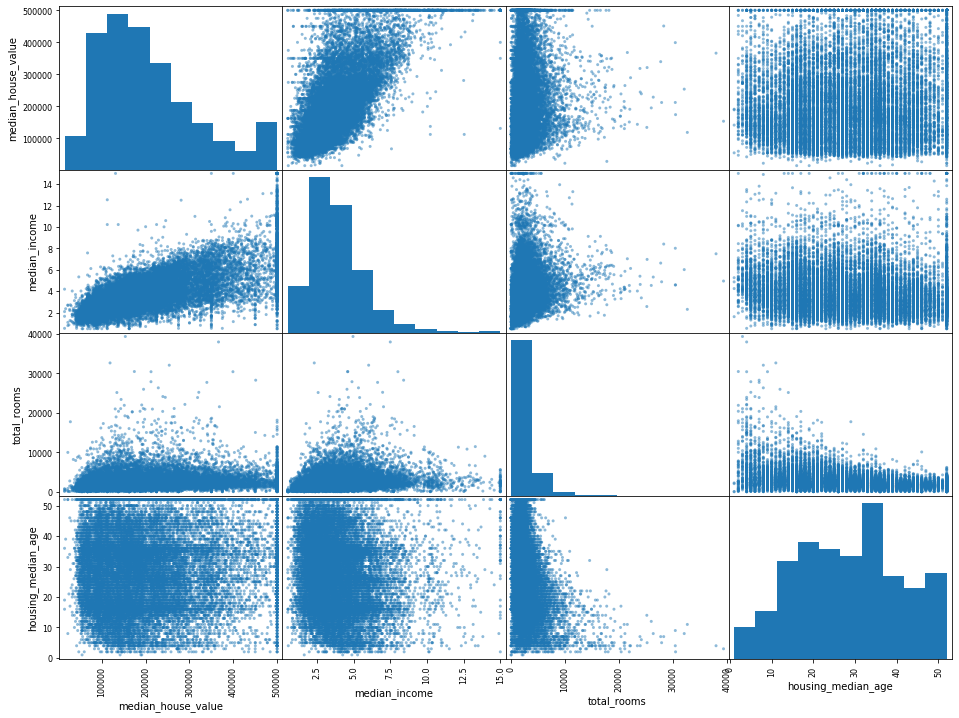

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(16,12))
plt.show()

### **v）帕累托(pareto)图**

制作帕累托图的关键是传入_secondary_y=True_

![9TMluW](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/9TMluW.png)

### vi）饼图(pie)

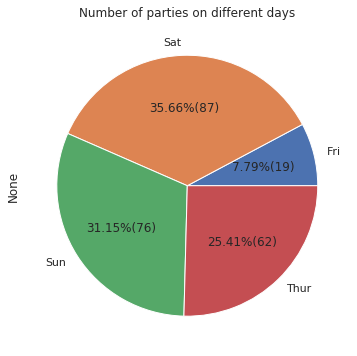

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"./mat50datas/tips.csv"

df = pd.read_csv(path, engine='python', encoding='utf_8_sig')

day = df.groupby('day').size()

sns.set()
day.plot(kind='pie', title='Number of parties on different days', figsize=[6,6],
         autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*day.sum()))
plt.show()